In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

Victor J. Maciá Medina.

These are some, improved, notes from a course on data analytics which took place at Washington University in St. Louis. Even if this is based on the classnotes, the final result is extended by introducing explanations of several of the concepts appearing here. This is written from a mathematical perspective but also contains Python implementations of these models.

The purpose of these notes is having a consultation guide where going back when needed.

## Recalling logistic regression


__Likelihood function__

$$log(L) = \sum_{i=1}^{n}y_i log(p_i)+(1-y_i log(1-p_i))$$

__Parameter model__ 

$$p_i = \frac{1}{1+\exp(-(\beta_0+\beta_1 x_1^i+ \dots + \beta_m x_m^i))}$$

Here we combine the sigmoid with the linear model.The problem is that the linear model is not giving back probabilities, to solve this problem we use a function taking values between 0 and 1. This function is

$$f(x) = \frac{1}{1+e^{-x}}$$

Let's plot this function.

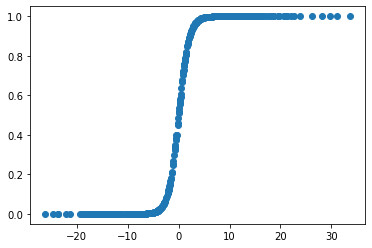

In [4]:
x = np.random.normal(0,1,500)
x = 10*x

def f(x): #calculates of the sigmoid for a given vector x
    y = len(x)*[0]
    for i in range(0,len(x)):
            y[i] = 1/(1+math.exp(-x[i]))
    return y

y = f(x)
plt.scatter(x,y)

## The general idea of this method.

We have an array of values $y$ which are 0 or 1, yes or no, or in general two categories (We can generalize this to $n$ categories using the multinomial distribution). We want to model this using regression. The first problem we have is that a linear model $\beta_0 + \beta_1 x_1^{i}+ \dots \beta_m x_m^{i}$ does not work. For instance if you plot GPA against admission (in Graduate School), GPA is a continous variable taking values between 0 and 4 and admission is a discrete variable taking values 1 or 0 (or yes or no).

Let's study this in detail.

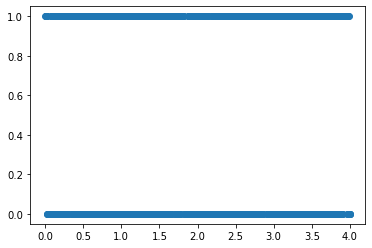

In [5]:
y = np.random.randint(2, size=1000)
x = 4*np.random.rand(1000)
plt.scatter(x,y)

__This cannot be modelled using linear regression!__

One of the variables takes continuous values but the other take discrete values, in particular 0 and 1.

Instead of assuming that $y$ follows a linear model we assume that $\log(\frac{p_i}{1-p_i})$, where $p_i$ is the parameter of the variable $Y_i$, follows a linear model.

In our particular case we have a vector, or an array given by an array of variables, which is a Bernoulli vector $Y$.

The log-odds of a Bernoulli variable of parameter $p$ is $\log(\frac{p}{1-p})$. We divide the probability of success by the probability of failure and then we take the logarithm of this quantity.

Suppose that the log-odd function for the event $Y_i = 1$, follows a linear model. That is, for each $p_i$ we have

$$\log(\frac{p_i}{1-p_i}) = \sum_{j=1}^{n}\beta_j x_j^{i}$$

Therefore

$$\frac{p_i}{1-p_i} = \exp\left(\sum_{j=1}^{n}\beta_j x_j^{i}\right)$$

In particular

$$p_i = \frac{1}{1+\exp\left(-\sum_{j=1}^{n}\beta_j x_j^{i}\right)}$$


Notice that we can use any base for the logarithm. Here I use the natural logarithm. Let's see a complete example.

In [6]:
X1 = 2*np.random.rand(5000,1)
X2 = 5*np.random.rand(5000,1)
X3 = np.random.rand(5000,1)

eta = 0.5*X1+0.1*X2+1.56*X3-1
X = np.column_stack([X1,X2,X3])
p = 1/(1+np.exp(-eta))

y = np.random.binomial(1,p).reshape(5000,1)

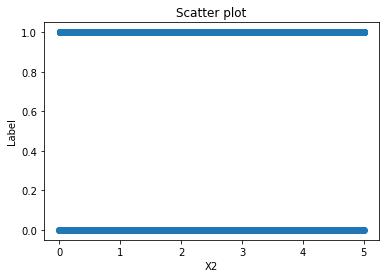

In [7]:
plt.scatter(X[:,1],y)
plt.title('Scatter plot')
plt.xlabel('X2')
plt.ylabel('Label')
plt.show()

## Implementing logistic regression using Newton-Raphson

__Hessian matrix__

\begin{align*}
H = -X^TWX, 
\end{align*}

Here $W$ is 

\begin{align*}
W = \begin{bmatrix}
p_1(1-p_1) & \dots  & & &  \\
  & p_2(1-p_2) & & &\\
\vdots &  &  &  & \\
 & & & & \\
 & & \ddots & &  \\
 & & & p_n(1-p_n) &
\end{bmatrix}
\end{align*}

where $W$ is a diagonal matrix.

__Newton Raphson algorithm formula__

$$\beta^{(k+1)} = \beta^{(k)}+(X^TWX)^{-1}X^T(y-p)$$

where $k$ denotes the $k-th$ iteration. Here we choose $\beta^{(0)}$ as initial point. (Recall that in the Newton-Raphson method we choose the first point, we calculate the tangent to the function at that point and then we find a new point close to the zero which is the zero of the tangent line at the initial point. We iterate.)

__The idea under this formula__

We want to find the parameters $\beta$. The function we get when differenting the maximum likelihood function is difficult to manage (we want to apply the maximum likelihood estimation).

We apply the maximum likelihood estimation when modeling $p_i$ as

$$p_i = \frac{1}{1+\exp\left(-\sum_{j=1}^{m}\beta_j x_j^{i}\right)}$$

We have 

\begin{align*}
L(p;\beta) = \prod_{j=1}^{m} (1-p_j)^{1-y_j}p_j^{y_j}
\end{align*}

We maximize this function respect to $\beta$ (we assume that $y_i$ is given). We take logarithms 

\begin{align*}
l = \log(L) = \sum_{j=1}^{m}\left((1-y_j)\log(1-p_j)+y_j\log(p_j)\right)
\end{align*}

Taking partial derivatives

$$\frac{\partial l}{\partial \beta_k} = \sum_{j=1}^{m} \left( -(1-y_j)\frac{\frac{\partial p_j}{\partial \beta_k}}{1-p_j}+y_j\frac{\frac{\partial p_j}{\partial \beta_k}}{p_j}\right) $$

Notice that
\begin{align*}
\frac{\partial p_j}{\partial \beta_k} = (1-p_j)p_j\frac{\partial \sum_{l=1}^{m}\beta_j x_l^{j} }{\partial \beta_k} = (1-p_j)p_j x_k^j.
\end{align*}

Therefore 

\begin{align*}
\frac{\partial l}{\partial \beta_k} = \sum_{j=1}^{m}(y_j-p_j)x_k^j.
\end{align*}

We want to solve the equation

\begin{align*}
\sum_{j=1}^{m}(y_j-p_j)x_k^j = 0
\end{align*}

The term $p_j$ is non-linear, in the linear regression model we find $(y_j-x^{i}\cdot \beta)$, where $x^{i}$ and $\beta$ are vectors, in this case the model is linear and we can solve the equation using linear algebra.

For the case $\sum_{j=1}^{m}(p_j-y_j)x_k^j = 0$, where $p_i$ is non linear, we will use an iterative method, the Newton-Raphson algorithm. 

## Newton-Raphson

We will introduce here the Newton-Raphson method in a informal way.
Suppose we have real differentiable function, of one real variable, $f(x)$, chose $x_0 \in \mathbb{R}$. Suppose that the derivative of $f$ is non zero in a, big enough, open set around the zero we are trying to find (This is a silly hypothesis in practice, we are applying a practical algorithm we are not really worried about the mathematical details). We write the tangent line to $f$ at this point.

\begin{align*}
f'(x_0)(x-x_0)+f(x_0)
\end{align*}

we find the zero of this line

$$x = x_0-\frac{f(x_0)}{f'(x_0)}$$

In general we find an algorithm to find a zero of $f$,

$$x_n = x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}$$

When this algorithm converges, the convergence is cuadratic.

We want to apply this algorithm to our previous equation. We can apply this algorithm to the derivative with respect to $\beta$ of the log-likelihood function. We obtain the formula

$$\beta^{(k+1)} = \beta^{(k)}-H^{-1}(\beta) \nabla log(L)(\beta)$$

where $H$ is the Hessian matrix of $l = log(L)(\beta)$. This is the Newton-Raphson method in higher dimension.

In practice we need to calculate the Hessian matrix. Notice that

\begin{align*}
\frac{\partial^2 l}{\partial \beta_s \beta_t} = -p_i(1-p_i)x_s^{i} x_t^{i}
\end{align*}

Recall that 

\begin{align*}
\frac{\partial l}{\partial \beta_k} = \sum_{j=1}^{m}(y_j-p_j)x_k^j,
\end{align*}

and

\begin{align*}
\frac{\partial p_j}{\partial \beta_k} = (1-p_j)p_j x_k^j.
\end{align*}

If we write this using matrices, we find that

$$H = -X^t W X.$$

Now recall that 

$$\nabla l = (\frac{\partial l}{\partial \beta_0}, \frac{\partial l}{\partial \beta_1}, \dots, \frac{\partial l}{\partial \beta_m})^t$$

and 

\begin{align*}
\frac{\partial l}{\partial \beta_k} = \sum_{j=1}^{m}(y_j-p_j)x_k^j,
\end{align*}

therefore 

$$\nabla l = X^t(y-p)$$

Going back to Newton-Raphson, we get 

$$\beta^{(k+1)} = \beta^{(k)}+(X^t W X)^{-1}X^t(y-p)$$

where 

\begin{align*}
W = \begin{bmatrix}
p_1(1-p_1) & \dots  & & &  \\
  & p_2(1-p_2) & & &\\
\vdots &  &  &  & \\
 & & & & \\
 & & \ddots & &  \\
 & & & p_n(1-p_n) &
\end{bmatrix}.
\end{align*}


We initialize this algorithm taking an initial $\beta_0$. With this $\beta_0$ we can calculate $p$. We stop the iterations when the error $|\beta^{k}-\beta^{(k-1)}|$ is small enough.

__Comments about the implementation__

$\Delta\beta = (X^t W X)^{-1}X^t(y-p)$ -> deltabeta parameter which varies on each iteration.

This is the piece in our previous equation which is giving us the next iteration. Notice that this equation is $\beta$ dependent, we have to use the 'new beta' in each iteration to calculate $p$ (which depends on beta).

In [8]:
# Implementation of the previous algorithm


# Here we are using the X values from above, refer to the comment below.

X1 = 2*np.random.rand(5000,1)
X2 = 5*np.random.rand(5000,1)
X3 = np.random.rand(5000,1)

eta = 0.5*X1+0.1*X2+1.56*X3-1
X = np.column_stack([X1,X2,X3])
p = 1/(1+np.exp(-eta))

y = np.random.binomial(1,p).reshape(5000,1)


# The piece of code above this line was written at the beginning ---
# This is just for the sake of clarity.

beta = np.array([0.2,0.1,0.1]).reshape(-1,1) # initial beta - transpose - reshape(-1,1)

Deltabeta = np.array([0.1,0.1,0.1]).reshape(-1,1) # The initial Deltabeta should be bigger than your while-condition

while np.max(np.abs(Deltabeta))>1e-15:
       p = 1/(1+np.exp(-np.matmul(X,beta))) # probabilities at each iteration
       W = np.diag(np.multiply(p,(1-p))[:,0]) # matrices in the decomposition
       XtY = np.matmul(X.T,(y-p))
       XtWX = np.matmul(np.matmul(X.T,W),X)
       Deltabeta = np.matmul(np.linalg.inv(XtWX),XtY)
       beta = beta + Deltabeta
beta.T

# We can predict the probability of an outcome using this model.

array([[ 0.21663222, -0.04182741,  1.02688307]])

## Really important remark: 

We are modelling the problem without intercept. When you do this, the results are different than when we model 
the problem considering the intercept.

When implementing Newton-Raphson we have to consider this and adding a column with one at the firt column of the matrix, moving the other columns to the right.

__Model prediction__


__Prediction from this logistic-regression model__

In [113]:
p = 1/(1+np.exp(-np.matmul(beta.T,X[0])))
p # We are fixing the first column of the matrix X,  
  # then this is the predition for p_0 using the logistic regression.
    
    

array([0.55375528])

__Prediction using the sklearn built-in model__

This is the sklearn code and its parameters

```class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
```

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'none', solver = 'newton-cg', fit_intercept = False)

# We will see the penalty option later, none -> standard logistic regression
# solver = 'newton-cg', give you the method to find beta
# fit_intercept = False, by default the model provides you beta_0 
# if we set false, because we want to compare this with our previous model,
# the model does not give you beta_0.

lr.fit(X,y.reshape(y.size))

print([lr.coef_,lr.intercept_])

[array([[0.44237929, 0.05100324, 1.4861764 ]]), array([-0.745295])]


In [139]:
lr.predict_proba(X[0:1]) # This code gives a matrix and not an array X[0:1]

# Here we obtain the probability for the first parameter to be zero
# and the probability for the second parameter to be one.

array([[0.37867324, 0.62132676]])

The parameters we obtain here are the same than our previous parameters.




# Poisson regression


Consider the car accident in St. Louis in a particular day. We have 365 days and the number of accidents per day. Our vector $y$ takes values freely between minus infinity and infinity (in this case, discrete values). 

We also consider some other variables as weather, etc. In this particular case $y$ could take values, for instance, between 0 and 1000. y will be a function of weather, weakday etc.

In the linear regression model we can assume $y$ follows a normal distribution. In the logistic regression we assume Binomial or Bernoulli.
In this example we consider the poisson distributions.

Recall that the poisson distributions models the number of events happening in a certaing time interval.

To clarify a little this. The Poisson distribution gives the probability of a given number of events ocurring in a fixed period of time or space, where the mean rate is constant and each trial is independent.

We model our problem using a Poisson distribution. Instead of model $y$ using a linear model we will model $y \sim Poiss(\lambda)$ by modeling the parameter $\lambda$, that is, $\lambda = f(x) = e^{x \cdot \beta}$, where $x,\beta$ are vectors and $\cdot$ means dot product.

Likelihood function.

$$L(y_i,\lambda_i) = \frac{\lambda_i^{y_i}}{y_i!}e^{-\lambda_i}$$

therefore the total likelihood function is

\begin{align*}
L = \prod_{j=1}^{n} \frac{\lambda_i^{y_i}}{y_i!}e^{-\lambda_i}.
\end{align*}

Taking logarithms we find that

\begin{align*}
l = \log(L) = \sum_{i=1}^{n}\left(y_i\log(\lambda_i)-\lambda_i-log(y_i!)\right)
\end{align*}

Recall that we modeled $\lambda_i = x^{i} \cdot \beta$, where $x^{i}$ is the i-th column of the matrix $X$. Using this remark we find that

\begin{align*}
l = \log(L) = \sum_{i=1}^{n}\left(y_i x^{i}\cdot \beta-e^{x^{i} \cdot \beta}-log(y_i!) \right).
\end{align*}

Taking partial derivatives, we find that

\begin{align*}
\frac{\partial l}{\partial \beta_k} = \sum_{i=1}^{n} \left( y_i x^{i}_k-e^{x^{i} \cdot \beta}x^{i}_k \right) = \sum_{i=1}^{n} \left((y_i-e^{x^{i} \cdot \beta})x^{i}_k\right) = \sum_{i=1}^{n} \left((y_i-\lambda_i)x^{i}_k\right). 
\end{align*}

We want to maximize $l$. in order to do that we should find the zeros of the previous partial derivative.


Again __Newton-Raphson__:


Again we have to calculat the Hessian matrix $H$, that is, we have to calculate all the second order partial derivatives. Notice that

$$\frac{\partial^2 l}{\partial \beta_k \partial \beta_t} = -\sum_{i=1}^{n}\lambda_i x^{i}_k x^{i}_t.$$

Therefore we have
\begin{align*}
H = X^t \Lambda X
\end{align*}
where $\Lambda = (\lambda_i)_{ii}$ is a diagonal matrix.

We can apply againg Newton-Raphson to find that

$$\beta^{(k+1)} = \beta^{(k)}+H \nabla l$$

where $\beta^{0}$ is the initializing parameter.

# Generalized Linear Model (GLM)

There is a general model containing the previous ones. This is called generalized linear model. 

In the previous cases we assumed that $y$ was following a normal distribution in the linear regression case, a Bernoulli distribution in the Logistic regression case, and a Poisson distribution in the Poisson regression case.

1. In the linear regression case we modeled $\mu = \beta \cdot x$.

2. In the logistic regression case we modeled $p = \frac{1}{1+\exp(- \beta \cdot x)}$.

3. In the Poisson regression case we modeled $\lambda = e^{\beta \cdot x}$.


Here $\beta$ and $x$ represent vectors.  In all of these cases we consider the likelihood function. In general we write

\begin{align*}
L(y,x; \beta) = \prod_{i=1}^{n}L_i(y_i, \beta \cdot x^{i}).
\end{align*}

Then we use the log-likelihood function $l = log(L)$. We maximize this function using partial derivatives (here we use the maximum likelihood estimate). Then we use Newton-Raphson to find zeros of these partial derivatives. 

We can extract a general recipe from this procedure. We write the general exponential family

\begin{align*}
f(y) = \exp\left(\frac{y\theta-b(\theta)}{a(\phi)}+c(y,\phi) \right)
\end{align*}

where $a(\phi)$, $b(\theta)$ and $c(y,\phi)$ are functions. If we choose these functions adequately we recover the gaussian, the Bernoulli and the Poisson.

1. If we take $a(\phi) = \phi^2$, $b(\theta) =\frac{1}{2}\theta^2$ and $c(y,\phi) = -\frac{y^2}{2\phi^2}-\frac{1}{2}\log(2\pi \phi^2)$ we find that

$$f(y) = \frac{1}{\sqrt{2\pi}\phi}\exp(-\frac{(y-\theta)^2}{2\phi^2})$$

for $\theta = \mu$ and $\phi = \sigma$ we recover the Normal distribution.

2. If we take $\theta = log(p)-log(1-p)$, $a(\phi) = 1$, $b(\theta) = \log(1+e^{\theta})$, $c(y,\phi) = 0$, then we find that

$$f(y) = \exp(y\theta)\frac{1}{1+\exp{\theta}} = p^{y}(1-p)^{1-y}$$

where $e^{\theta} = \frac{p}{1-p}$, then $1+e^{\theta}= 1-p$. Then we recover the Bernoulli distribution.

3. This cover a lot of distributions. Look at the link: https://en.wikipedia.org/wiki/Exponential_family#Table_of_distributions

## Moments of the exponential family.

Let's studyt the moments of the exponential family. First we study the expectation. Let be $Y$ a random variable with law a exponential family. We write

\begin{align*}
\mathbb{E}(Y) = \int_{-\infty}^{\infty} yf(y)dy = \int_{-\infty}^{\infty}y \exp\left(\frac{y\theta-b(\theta)}{a(\phi)}+c(y,\phi)\right)dy.
\end{align*}

We differentiate with respect to $\theta$ under the integral sign, we do this informally, to find that 

\begin{align*}
\frac{\partial}{\partial \theta}\mathbb{E}(Y) = 0 = \int_{-\infty}^{\infty} \frac{\partial}{\partial \theta} y \exp\left(\frac{y\theta-b(\theta)}{a(\phi)}+c(y,\phi)\right)dy
\end{align*}

We get that
\begin{align*}
E(Y) = b'(\theta).
\end{align*}

This is really informal and __need to be improved__.

Some examples:

1. Normal distribution, $b(\theta) = \frac{1}{2}\theta^2$, therefore $b'(\theta) = \theta$.

2. Bernoulli distribution, $b(\theta) = \log(1+e^{\theta})$ and $b'(\theta) = \frac{e^{\theta}}{1+e^{\theta}} = \frac{\frac{p}{1-p}}{1+\frac{p}{1-p}} = p$.

For the variance we have $Var(Y) = a(\phi)b''(\theta)$.

## Likelihood function of the exponential family.

Suppose we have a variable $Y$, which is a vector, and a matrix $X$ conformed by the predictors. We write a matrix $[y^t, X]$.

$Y$ could follow any of the distributions given by the exponential family.

The Likelihood function for one value is 
$$L(y_i) = \exp(\frac{y_i \theta-b(\theta)}{a(\phi)}+c(y,\phi))$$

Now we made an assumption $E(Y) = b'(\theta) = g(x \cdot \beta)$, where $x$ and $\beta$ are vectors.

1. For instance for the Gaussian distribution, linear regression, we should take $g(z) = z$. 

2. For logistic regression we should take $g(z) = \frac{1}{1+\exp(x \cdot \beta)}$

The inverse of the function $g$ is called __link function__. In case where $g(z)=b'(z)$, the inverse of this function is call __the canonical link__.

## Optimizing the Generalized Linear Model (GLM).

We want to find $\beta$ maximizing the likelihood. The likelihood function is
\begin{align*}
L = \prod_{i=1}^{n} \exp(\frac{y_i \theta -b(\theta)}{a(\phi)}+c(y,\phi))
\end{align*}
here $b'(\theta_i) = g(x^{i} \cdot \beta)$.

The log-likelihood function is 
\begin{align*}
l = \log(L) = \sum_{i=1}^{n} \left[ \frac{y_i \theta -b(\theta)}{a(\phi)}+c(y,\phi) \right].
\end{align*}

We calculate the parcial derivatives

\begin{align*}
\frac{\partial l}{\partial \beta_j} = 0
\end{align*}
then we get the equality
\begin{align*}
\sum_{i=1}^{n}(y_i-b'(\theta_i))x^{i}_j = 0.
\end{align*}
This is the canonical link function.

This is telling us that:

1. If we take GLM gaussian + canonical link function $\iff$ linear regression
2. If we take GLM Binomial + canonical link funtion $\iff$ logistic regression
3. If we take GLM Poisson + canonical link function $\iff$ Poisson regression.

To use __Newton-Raphson__ we need to calculate the Hessian. This is a complex calculation, I won't write this here. In this calculations everything depends on the data sets.

We should use, again, the formula

\begin{align*}
\beta^{k+1} = \beta^{k}-H^{-1}\nabla l(\beta)
\end{align*}



## Implementing GLM in Python

In [16]:
# This is implemented using a python package

# Libraries

import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm # This is the library we will use to implement GLM




## Generalized Linear Model: Gaussian distribution

In [38]:
X = np.random.randn(5000,3)
Y = .3*X[:,[0]]+X[:,[1]]+2*X[:,[2]]+2+np.random.randn(5000,1)

# If we add a bracket inside the matrix we get the transpose directly
# I mean the transpose of the vector we are recovering from the matrix.

array([-0.42429618, -1.31878899, -1.08886687, ...,  0.9096764 ,
        0.14669065, -0.05173123])

## Build GLM in statsmodels

__Understading a p-value__

- A p-value less than 0.05 is statistically significant.
- A p-value higher than 0.05 is statistically significant.

In [41]:
X_pd = pd.DataFrame(X) # We need to use dataframes with this library.
X_pd = sm.add_constant(X_pd) # create the matrix that will lead to the beta_0 coeff.
Y_pd = pd.DataFrame(Y)

# To get an intercept we need to have an x_0 variable which is 1. This
# is what we do in add constant.



In [43]:
# Create a Gaussian model with the default link function 

gaussian_model = sm.GLM(Y_pd,X_pd, family = sm.families.Gaussian())
gaussian_model_results = gaussian_model.fit() # take parameters and fit the model
print(gaussian_model_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4996
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                         0.97248
Method:                          IRLS   Log-Likelihood:                -7022.9
Date:                Sat, 10 Oct 2020   Deviance:                       4858.5
Time:                        00:17:02   Pearson chi2:                 4.86e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0013      0.014    143.487      0.0

We get back a lot of information. We even recover some confidence intervals.

## Compare with Linear Regression in sklearn

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X,Y)
print([reg.coef_,reg.intercept_])

# We get the same values

[array([[0.29046699, 0.99536256, 2.03043557]]), array([2.00127072])]


## Generalized Linear Model: Bernoulli distribution

In [48]:
X1 = 2*np.random.rand(5000,1)
X2 = 5*np.random.rand(5000,1)
X3 = np.random.rand(5000,1)

eta = 0.5*X1+0.1*X2+1.56*X3-1
X = np.column_stack([X1,X2,X3])
p = 1/(1+np.exp(-eta))

y = np.random.binomial(1,p).reshape(5000,1)

In [49]:
# Dataframes

X_pd = pd.DataFrame(X)
X_pd = sm.add_constant(X_pd) # Create the [X,1] matrix
Y_pd = pd.DataFrame(y)

## Build GLM statsmodel

In [53]:
# Gaussian family model with the default link function

binomial_model = sm.GLM(Y_pd,X_pd, family = sm.families.Binomial())
binomial_model_results = binomial_model.fit()

print(binomial_model_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      0   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4996
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3179.3
Date:                Sat, 10 Oct 2020   Deviance:                       6358.6
Time:                        00:28:00   Pearson chi2:                 5.00e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9129      0.094     -9.661      0.0

## Compare with the logistic model using sklearn



In [55]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'none', solver = 'newton-cg')
lr.fit(X,y.reshape(y.size))

print([lr.coef_,lr.intercept_])

# The result is the same

[array([[0.4145558 , 0.10655078, 1.49479068]]), array([-0.91292916])]


# Saturated model and deviance.

In reality not all the data in the data set is useful. We won't use all the data. Sometimes we will create some variables (when we calculate the intercept we add a one column to $X$).

When the length of your data increase, you will have that the likelihood function will increase.

A saturated model is a model where there are as many estimated parameters as data points. In a saturated model we must have $\hat{y}_i = \hat{\theta}_i = y_i$. We have been using the hat notation without writing the hat previous to this comment.

Let's see an example using the logistic regression. $p_i = y_i$. The saturated model will have log-likelihood function

\begin{align*}
l_s = \sum_{i=1}^{n} y_i \log(y_i)+(1-y_i)\log(1-y_i).
\end{align*}

Suppose we want to study how far if our model from a saturated model. Suppose that our model has log-likelihood function $l$, then we take the difference
$$-2(l-l_s)$$
this is called the __Deviance__.

Some examples:

1. For the Normal distribution the deviance is 
\begin{align*}
-\frac{1}{2\phi}\sum_{i=1}^{n}(y_i-x^{i}\cdot \beta)
\end{align*}
where $\theta_i = x^{i}\beta$. Here the deviance is almost the MSE (Mean Square Error).

Deviance is always bigger than zero. The saturated model has a bigger likelihood.